# 1. Introdução ao aprendizado profundo

O **aprendizado profundo** (*deep learning*) constitui uma subárea do aprendizado de máquina dedicada ao desenvolvimento de modelos capazes de extrair **representações hierárquicas dos dados**. Diferentemente dos algoritmos clássicos de aprendizado supervisionado, que dependem de etapas explícitas de extração de características, os modelos profundos aprendem automaticamente essas representações a partir dos próprios dados, o que lhes confere notável capacidade de generalização em tarefas complexas.

O termo “profundo” refere-se à presença de **múltiplas camadas de processamento interconectadas**, cada uma responsável por transformar as entradas em representações progressivamente mais abstratas. Essa profundidade permite ao modelo capturar padrões complexos, como relações espaciais em imagens, dependências temporais em séries ou estruturas sintáticas em texto.

Historicamente, o aprendizado profundo emergiu como resposta às **limitações dos métodos convencionais** de aprendizado de máquina, cujos desempenhos degradavam significativamente diante de dados de alta dimensionalidade ou grande variabilidade. O avanço simultâneo do poder computacional (especialmente com o uso de unidades de processamento gráfico, GPUs) e da disponibilidade de grandes bases de dados foi determinante para a consolidação dessa abordagem.

O impacto do aprendizado profundo transcende o domínio da ciência da computação. Em **engenharia elétrica**, tem sido aplicado em reconhecimento de padrões de sinais, controle de sistemas complexos, manutenção preditiva e diagnóstico de falhas. Sua capacidade de adaptação e aprendizado contínuo torna-o ferramenta estratégica para a automação inteligente e para a **tomada de decisão em tempo real** em ambientes industriais e energéticos.

# 2. O neurônio artificial

O conceito de **neurônio artificial** tem origem na tentativa de reproduzir, de forma simplificada, o funcionamento das células nervosas biológicas. Em 1943, Warren McCulloch e Walter Pitts propuseram o primeiro modelo matemático de neurônio, no qual cada unidade recebe múltiplos sinais de entrada, pondera-os por **pesos sinápticos** e produz uma saída em função de uma **função de ativação**.

Matematicamente, o neurônio artificial pode ser representado como:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

em que $x_i$ são as entradas, $w_i$ os pesos associados, $b$ o termo de viés (*bias*) e $f(\cdot)$ a função de ativação, responsável por introduzir **não linearidade** no modelo. Essa não linearidade é essencial para que redes neurais possam representar funções complexas e não apenas combinações lineares das entradas.

As **funções de ativação** mais comuns incluem:

- **Sigmoid:** usada historicamente, transforma o valor de entrada em um intervalo entre 0 e 1, simulando o comportamento de disparo de um neurônio biológico.  
- **Tanh:** semelhante à sigmoid, mas centrada em zero, favorecendo a convergência do treinamento.  
- **ReLU (Rectified Linear Unit):** amplamente utilizada em redes modernas por sua simplicidade e eficiência computacional; define $f(x) = \max(0, x)$.

Essas funções são cruciais para o aprendizado, pois permitem que a rede capture relações não lineares e aprenda representações internas úteis dos dados.

O **neurônio artificial** é, portanto, a unidade fundamental das redes neurais. Quando interligados em camadas sucessivas, esses neurônios formam sistemas capazes de aproximar funções complexas, reconhecer padrões e generalizar a partir de exemplos. Tal estrutura constitui a base conceitual sobre a qual o aprendizado profundo foi construído.


Saída (Sigmoid): 0.7150421057009897
Saída (Tanh): 0.7258974148490807
Saída (ReLU): 0.9199999999999999


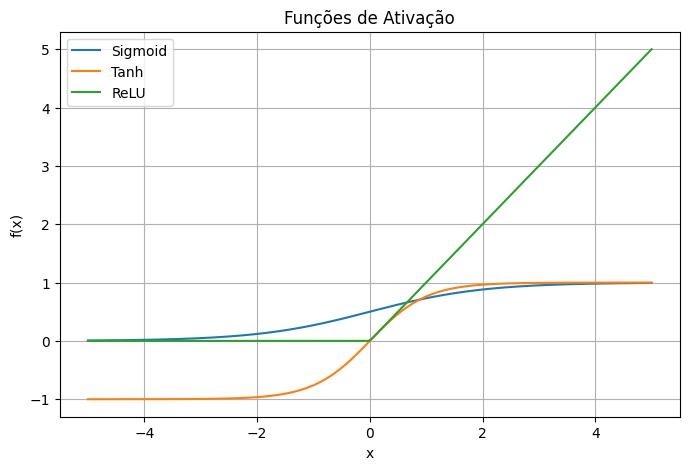

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Implementação de um neurônio simples
def neuron_output(x, w, b, activation):
    z = np.dot(w, x) + b
    return activation(z)

# Exemplo de entradas e pesos
x = np.array([0.6, 0.9, 0.3])
w = np.array([0.4, 0.7, -0.5])
b = 0.2

# Cálculo das saídas para diferentes ativações
y_sigmoid = neuron_output(x, w, b, sigmoid)
y_tanh = neuron_output(x, w, b, tanh)
y_relu = neuron_output(x, w, b, relu)

print("Saída (Sigmoid):", y_sigmoid)
print("Saída (Tanh):", y_tanh)
print("Saída (ReLU):", y_relu)

# Visualização das funções de ativação
x_plot = np.linspace(-5, 5, 200)
plt.figure(figsize=(8, 5))
plt.plot(x_plot, sigmoid(x_plot), label="Sigmoid")
plt.plot(x_plot, tanh(x_plot), label="Tanh")
plt.plot(x_plot, relu(x_plot), label="ReLU")
plt.title("Funções de Ativação")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


### Explicação do código

O código apresentado implementa um **neurônio artificial** de forma explícita, utilizando apenas operações vetoriais do NumPy.  
Cada entrada do vetor `x` é multiplicada por um **peso sináptico** correspondente no vetor `w`. O termo `b` representa o **viés** (*bias*), que desloca a função de ativação e permite maior flexibilidade no aprendizado.

O valor interno calculado, chamado de **potencial de ativação**, é dado por:

$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

Em seguida, o valor de $z$ é processado por uma **função de ativação**, que define a saída do neurônio.  
Três funções são comparadas:

- **Sigmoid:** gera saídas contínuas entre 0 e 1, historicamente utilizada em redes iniciais.  
- **Tanh:** semelhante à Sigmoid, porém centrada em zero, o que melhora a convergência.  
- **ReLU:** retorna zero para valores negativos e mantém valores positivos inalterados, sendo a mais comum em arquiteturas modernas.

O gráfico final permite visualizar o comportamento das três funções. Observa-se que a ReLU cresce linearmente para entradas positivas, enquanto as demais saturam conforme o valor de entrada aumenta. Essa característica torna a ReLU mais eficiente no treinamento de redes profundas.




---



# 3. Das primeiras redes aos fundamentos do aprendizado profundo

A formulação inicial do perceptron, proposta por Frank Rosenblatt (1958), modela um classificador linear que calcula
$$
\hat{y} = \mathrm{sign}\big(w^\top x + b\big)
$$
e ajusta os parâmetros por regra de atualização iterativa quando há erro de classificação. Embora eficiente em problemas linearmente separáveis, o perceptron não resolve funções não lineares como o XOR, o que levou a críticas importantes registradas na literatura clássica.

A introdução de **camadas ocultas** possibilitou a composição de funções, criando modelos com maior capacidade de representação. Nessas redes *feedforward*, cada camada aplica uma transformação afim seguida de uma função de ativação não linear. O treinamento dessas redes tornou-se viável com o algoritmo de **retropropagação do erro** (Rumelhart, Hinton e Williams, 1986), que utiliza a regra da cadeia para calcular gradientes de forma eficiente.

Dado um conjunto de treinamento \(\{(x^{(i)}, y^{(i)})\}_{i=1}^m\) e uma função de perda \( \mathcal{L}(\theta) \), o procedimento de descida do gradiente atualiza
$$
\theta \leftarrow \theta - \eta \nabla_\theta \mathcal{L}(\theta)
$$
onde \( \eta \) é a taxa de aprendizado. A retropropagação fornece \( \nabla_\theta \mathcal{L} \) camada a camada.

Durante as décadas de 1970 e 1980, limitações de dados, poder computacional e problemas de **desaparecimento do gradiente** restringiram o avanço prático, originando o chamado período de invernos da IA. O ressurgimento ocorreu a partir dos anos 2000 e 2010, com a combinação de **grandes bases de dados**, **aceleração por GPUs** e **técnicas de regularização e inicialização** que estabilizaram o treinamento de arquiteturas mais profundas.

---

In [ ]:
import numpy as np

# Funções auxiliares
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Base de dados XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])

# Semente para reprodutibilidade
np.random.seed(42)

# Inicialização dos pesos e vieses
input_size = 2
hidden_size = 8
output_size = 1

W1 = np.random.uniform(-1, 1, (input_size, hidden_size))
b1 = np.random.uniform(-1, 1, (1, hidden_size))
W2 = np.random.uniform(-1, 1, (hidden_size, output_size))
b2 = np.random.uniform(-1, 1, (1, output_size))

# Taxa de aprendizado
lr = 0.5
epochs = 1000000

# Treinamento
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Cálculo do erro
    error = y - a2

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)

    # Atualização dos pesos
    W2 += np.dot(a1.T, d_a2) * lr
    b2 += np.sum(d_a2, axis=0, keepdims=True) * lr
    W1 += np.dot(X.T, d_a1) * lr
    b1 += np.sum(d_a1, axis=0, keepdims=True) * lr

# Saída final
print("Saída da rede após o treinamento:")
print(a2.round(3))


Saída da rede após o treinamento:
[[0.001]
 [0.999]
 [0.999]
 [0.001]]


### Explicação do código

O código implementa uma **rede neural multicamada (MLP)** do tipo *feedforward*, composta por:

- **Camada de entrada:** dois neurônios (para as variáveis do problema XOR).  
- **Camada oculta:** três neurônios com ativação sigmoid.  
- **Camada de saída:** um neurônio, também com ativação sigmoid.

O problema **XOR** é clássico no estudo de redes neurais, pois **não é linearmente separável**, o que significa que nenhum classificador linear simples pode resolvê-lo.  
A introdução de uma camada oculta permite à rede combinar entradas de forma não linear e, portanto, aprender essa relação complexa.

O processo de aprendizado segue as etapas:

1. **Forward pass:** os dados percorrem as camadas, produzindo uma predição.  
2. **Cálculo do erro:** a diferença entre a saída prevista e a saída desejada.  
3. **Backpropagation:** o erro é propagado para ajustar os pesos das camadas, aplicando o **gradiente descendente**.  

Após o treinamento, as saídas esperadas para as quatro combinações de entrada aproximam-se de `[0, 1, 1, 0]`, evidenciando que a rede aprendeu corretamente a função XOR.  
Esse exemplo ilustra como o acréscimo de camadas e não linearidades transforma redes simples em sistemas capazes de modelar relações complexas.




---



# 4. Arquiteturas profundas e suas características

O termo profundidade refere-se ao empilhamento de múltiplas camadas não lineares. Essa hierarquia promove **aprendizado de representações** de baixa para alta abstração. Quatro famílias conceituais resumem a transição para o aprendizado profundo moderno.

**Redes densas (DNNs).** Utilizam camadas totalmente conectadas. São modelos gerais para dados tabulares e vetoriais. A capacidade de aproximação universal decorre da composição de não linearidades, mas o número de parâmetros cresce rapidamente com a dimensionalidade.

**Redes convolucionais (CNNs).** Introduzem filtros convolucionais locais e compartilhamento de pesos para explorar **invariância translacional** em sinais e imagens. A operação de convolução 2D entre filtro \(K\) e mapa \(X\) é definida por
$$
(Y * K)_{i,j} = \sum_{u,v} X_{i+u,\,j+v}\,K_{u,v}
$$
seguida de não linearidade e operações de *pooling*. Essa estrutura reduz parâmetros e captura padrões espaciais hierárquicos.

**Redes recorrentes (RNNs).** Modelam dependências temporais com estados ocultos. Dadas entradas \(x_t\) e estado \(h_{t-1}\), uma atualização típica é
$$
h_t = f\big(W_h h_{t-1} + W_x x_t + b\big)
$$
Arquiteturas como LSTM e GRU mitigam gradientes que desaparecem em sequências longas por meio de portas que controlam fluxo de informação.

**Autoencoders.** Aprendem codificações compactas por meio de uma função de compressão \(z = g_\phi(x)\) e reconstrução \(\hat{x} = h_\psi(z)\), minimizando uma perda de reconstrução. Variantes incluem autoencoders esparsos, *denoising* e variacionais, estes últimos com hipótese generativa explícita.

Elementos técnicos que viabilizam profundidade incluem **ReLU** e variantes, **inicializações adequadas** que preservam variância entre camadas, **normalização em lote** que estabiliza o fluxo de gradientes e **regularização** por *dropout* e penalizações de peso. Na prática, a escolha arquitetural depende da natureza do dado. CNNs são apropriadas para estruturas espaciais, RNNs para séries temporais e DNNs para dados vetoriais e tabulares, enquanto autoencoders apoiam compressão, detecção de anomalias e pré-treinamento não supervisionado.

# 5. Treinando redes com Keras/TensorFlow

O treinamento de uma rede neural consiste em ajustar seus pesos de modo que as predições realizadas se aproximem das saídas esperadas. O processo é iterativo e envolve a minimização de uma **função de perda** que quantifica o erro entre a saída prevista e a verdadeira.

No *framework* TensorFlow, a biblioteca **Keras** fornece uma API de alto nível que abstrai a implementação dos detalhes numéricos do gradiente descendente e da retropropagação. O treinamento ocorre em ciclos chamados **épocas**, durante os quais os dados são divididos em lotes (*batches*) e processados sucessivamente.

O algoritmo de otimização mais comum é o **Adam**, que combina momento e adaptação individual da taxa de aprendizado.  
Durante o treinamento, a evolução das métricas de desempenho — como **acurácia**, **erro quadrático médio (MSE)** ou **entropia cruzada** — é monitorada tanto no conjunto de treino quanto no de validação. Essa separação permite detectar **overfitting**, quando o modelo memoriza o conjunto de treinamento e perde capacidade de generalização.

A regularização pode ser obtida por técnicas como *dropout*, penalização de pesos (L1/L2) ou interrupção antecipada (*early stopping*). Ao final, a rede é avaliada em dados independentes, e as previsões podem ser analisadas por meio de matrizes de confusão, curvas ROC ou métricas de regressão, dependendo do tipo de problema.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8499 - loss: 0.5157 - val_accuracy: 0.9663 - val_loss: 0.1240
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9514 - loss: 0.1620 - val_accuracy: 0.9725 - val_loss: 0.0940
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9656 - loss: 0.1133 - val_accuracy: 0.9755 - val_loss: 0.0850
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9702 - loss: 0.0968 - val_accuracy: 0.9790 - val_loss: 0.0752
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9751 - loss: 0.0794 - val_accuracy: 0.9793 - val_loss: 0.0748
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9796 - loss: 0.0648 - val_accuracy: 0.9820 - val_loss: 0.0715
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9809 - loss: 0.0593 - val_accuracy: 0.9785 - val_loss: 0.0764
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9821 - loss: 0.0532 -

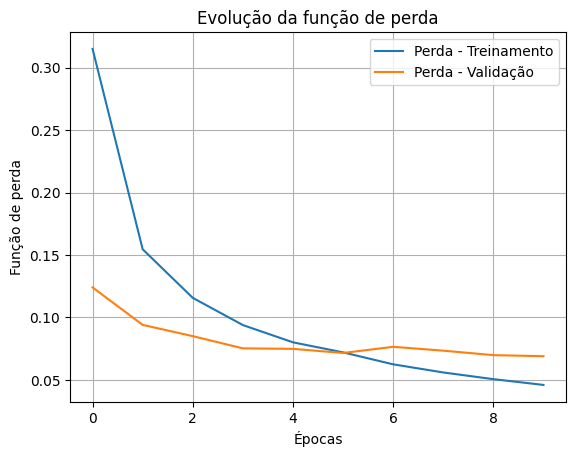

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Carregar o dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalização dos dados
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

# Definição do modelo
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])

# Compilação do modelo
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Treinamento
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_split=0.1, verbose=1)

# Avaliação
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")

# Visualização do desempenho
plt.plot(history.history["loss"], label="Perda - Treinamento")
plt.plot(history.history["val_loss"], label="Perda - Validação")
plt.xlabel("Épocas")
plt.ylabel("Função de perda")
plt.legend()
plt.grid(True)
plt.title("Evolução da função de perda")
plt.show()


### Explicação do código

O notebook implementa uma **rede neural multicamada** (*Multilayer Perceptron*) para classificar dígitos manuscritos do conjunto **MNIST**.  
Cada imagem de 28×28 pixels é transformada em um vetor de 784 elementos e processada por uma camada oculta com 128 neurônios e ativação **ReLU**. A camada de saída contém 10 neurônios com **Softmax**, produzindo uma distribuição de probabilidade sobre as classes.

O otimizador **Adam** é empregado pela robustez e pela adaptação automática da taxa de aprendizado.  
A perda usada é a **entropia cruzada categórica**, adequada a problemas de classificação multiclasse.

Durante o treinamento, observa-se a redução da função de perda tanto no conjunto de treinamento quanto no de validação.  
Diferenças crescentes entre essas curvas indicam **overfitting**, enquanto curvas paralelas e estáveis sugerem boa capacidade de generalização.

Ao final, o modelo atinge alta acurácia mesmo com estrutura simples, demonstrando a eficiência das redes densas para tarefas de classificação supervisionada.




---



# 6. Evolução recente: modelos generativos e atenção

A evolução do aprendizado profundo nas últimas duas décadas foi marcada pelo surgimento de arquiteturas especializadas que ampliaram o alcance das redes neurais em domínios complexos como geração de imagens, processamento de linguagem natural e síntese de sinais.

## 6.1 Modelos generativos

Os **modelos generativos** aprendem a estimar a distribuição de probabilidade dos dados de treinamento, permitindo a geração de novos exemplos coerentes com o conjunto original. Entre os mais influentes, destacam-se:

**Autoencoders variacionais (VAE).** Introduzem uma camada latente probabilística, em que o codificador mapeia a entrada para uma distribuição normal parametrizada, e o decodificador reconstrói a amostra a partir de uma variável aleatória gerada. Essa abordagem combina aprendizado não supervisionado e modelagem estatística, sendo útil para compressão e geração de dados sintéticos.

**Redes adversariais generativas (GANs).** Propostas por Goodfellow et al. (2014), consistem em dois modelos treinados simultaneamente: um **gerador**, que cria amostras falsas, e um **discriminador**, que tenta distingui-las das reais. O aprendizado adversarial resulta em geradores capazes de produzir imagens, sons e textos de alta fidelidade. Essa técnica impulsionou avanços em visão computacional, restauração de imagens e síntese de fala.

## 6.2 Mecanismo de atenção e transformadores

O conceito de **atenção** surgiu em redes recorrentes como mecanismo para ponderar a relevância de diferentes partes da entrada durante a predição. O **transformer**, introduzido por Vaswani et al. (2017) no artigo *Attention Is All You Need*, substituiu completamente as estruturas recorrentes por blocos de atenção auto-regressiva e operações paralelizáveis.

Cada camada do transformer emprega o cálculo de atenção escalonada por produto interno:

$$
\mathrm{Attention}(Q, K, V) = \mathrm{softmax}\left(\frac{QK^\top}{\sqrt{d_k}}\right)V
$$

em que $Q$, $K$ e $V$ são, respectivamente, as matrizes de consultas, chaves e valores, e $d_k$ é a dimensão da chave. Esse mecanismo permite capturar dependências de longo alcance e processar sequências inteiras em paralelo, reduzindo o tempo de treinamento.

Os transformadores tornaram-se a base de modelos de larga escala como **BERT**, **GPT**, **T5** e **ViT**, empregados em tradução automática, geração de texto, reconhecimento de fala e análise de imagens. A escalabilidade e a capacidade de aprendizado contextual tornaram essa arquitetura o paradigma dominante em inteligência artificial contemporânea.

## 6.3 Impactos na engenharia elétrica e na ciência de dados

Na engenharia elétrica, modelos generativos e de atenção têm sido aplicados em **síntese de sinais**, **reconstrução de imagens médicas**, **previsão de carga elétrica** e **diagnóstico de falhas**. Em ciência de dados, permitem abordagens autossupervisionadas e aprendizado transferível, reduzindo a dependência de grandes conjuntos rotulados.

Esses avanços representam uma transição conceitual: de redes que apenas ajustam parâmetros supervisionadamente para sistemas que **aprendem representações gerais**, podendo gerar, interpretar e decidir de forma autônoma. Essa característica define o estado atual do aprendizado profundo e direciona as perspectivas futuras da área.


# 7. Reflexão final e perspectivas para a engenharia elétrica

O avanço do aprendizado profundo transformou o modo como engenheiros analisam, modelam e controlam sistemas.  
As redes neurais passaram de ferramentas experimentais a componentes estruturais em aplicações industriais, energéticas e embarcadas. A integração de modelos preditivos a sistemas de controle, sensores e plataformas IoT possibilita **monitoramento inteligente**, **manutenção preditiva** e **otimização de processos em tempo real**.

O engenheiro elétrico contemporâneo precisa compreender não apenas os princípios físicos dos sistemas, mas também as **representações aprendidas por modelos neurais**. Essa interseção entre domínios físicos e computacionais define o perfil profissional da nova geração: capaz de interpretar dados complexos, projetar soluções baseadas em aprendizado e garantir robustez e eficiência em aplicações críticas.

A tendência é que as próximas décadas consolidem o uso de arquiteturas generativas e modelos de atenção também em sistemas industriais, com modelos capazes de prever falhas, simular cenários e gerar dados sintéticos para treinar controladores autônomos. O domínio dessas tecnologias amplia as fronteiras da engenharia elétrica para áreas antes restritas à computação ou à estatística aplicada.

---

## Estudo de caso proposto

Como exercício prático, propõe-se a construção de um modelo de aprendizado profundo capaz de **classificar padrões de vibração** em máquinas elétricas.  
O objetivo é distinguir automaticamente entre diferentes condições operacionais — como **normal**, **desbalanceamento** e **falha em rolamento** — a partir de sinais temporais coletados por sensores.

O conjunto de dados pode ser simulado ou obtido de bases públicas (por exemplo, CWRU Bearing Dataset).  
Será utilizada uma **rede convolucional unidimensional (1D-CNN)**, adequada à análise de sinais contínuos, implementada em TensorFlow/Keras.

---


Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4502 - loss: 1.0070 - val_accuracy: 0.0000e+00 - val_loss: 2.4361
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4682 - loss: 0.9155 - val_accuracy: 0.0000e+00 - val_loss: 2.6082
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4289 - loss: 0.9466 - val_accuracy: 0.0000e+00 - val_loss: 2.5494
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4615 - loss: 0.9414 - val_accuracy: 0.0000e+00 - val_loss: 2.6685
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4535 - loss: 0.9190 - val_accuracy: 0.0000e+00 - val_loss: 2.3619
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4867 - loss: 0.8974 - val_accuracy: 0.0000e+00 - val_loss: 2.4787
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4877 - loss: 0.8835 - val_accuracy: 0.0000e+00 - val_loss: 2.3065
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4568 - loss: 0.899

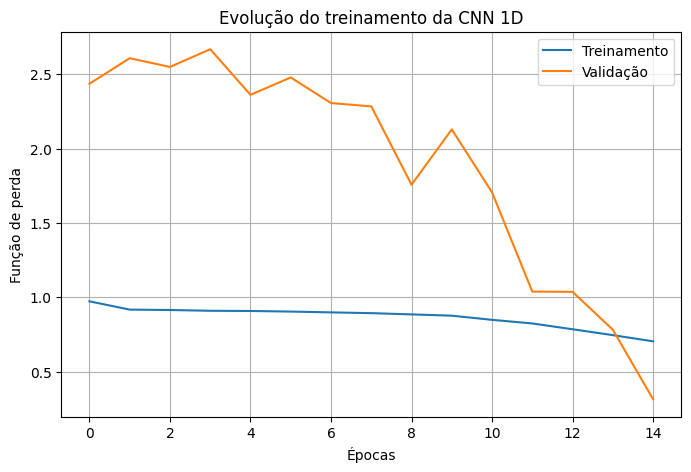

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Geração de sinais sintéticos
def generate_signal(label, n=1000):
    t = np.linspace(0, 1, n)
    if label == 0:  # normal
        return np.sin(2 * np.pi * 5 * t) + 0.1 * np.random.randn(n)
    elif label == 1:  # desbalanceado
        return np.sin(2 * np.pi * 5 * t + 0.5*np.sin(2*np.pi*0.5*t)) + 0.1 * np.random.randn(n)
    else:  # falha em rolamento
        signal = np.sin(2 * np.pi * 5 * t)
        spikes = np.random.choice(n, size=10, replace=False)
        signal[spikes] += np.random.uniform(2, 3, size=10)
        return signal + 0.1 * np.random.randn(n)

# Conjunto de dados
n_samples = 600
X = np.array([generate_signal(i//200) for i in range(n_samples)])
y = np.array([i//200 for i in range(n_samples)])

# Divisão em treino e teste
split = int(0.8 * n_samples)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Ajuste de formato
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Modelo CNN 1D
model = keras.Sequential([
    layers.Conv1D(16, 5, activation="relu", input_shape=(1000, 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(32, 5, activation="relu"),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Treinamento
history = model.fit(X_train, y_train, epochs=15, batch_size=16,
                    validation_split=0.1, verbose=1)

# Avaliação
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no conjunto de teste: {acc:.3f}")

# Curva de perda
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Treinamento")
plt.plot(history.history["val_loss"], label="Validação")
plt.xlabel("Épocas")
plt.ylabel("Função de perda")
plt.title("Evolução do treinamento da CNN 1D")
plt.legend()
plt.grid(True)
plt.show()


### Explicação do código

O estudo de caso demonstra o uso de uma **rede convolucional unidimensional (1D-CNN)** aplicada à análise de sinais de vibração.  
Cada amostra representa uma série temporal simulada de 1 segundo contendo ruídos e distorções associadas a diferentes condições operacionais de uma máquina elétrica.

A rede é composta por:

- Duas camadas convolucionais com filtros de tamanho 5 e ativação **ReLU**, responsáveis por extrair padrões locais.  
- Uma camada de *pooling* que reduz a dimensionalidade e aumenta a robustez a variações menores do sinal.  
- Uma camada *dense* final com ativação **softmax**, que produz probabilidades para cada classe (normal, desbalanceado, falha).

O modelo aprende automaticamente a distinguir os regimes de operação com base nas formas de onda.  
Mesmo em ambiente simulado, essa abordagem demonstra o potencial do aprendizado profundo para diagnósticos automatizados em engenharia elétrica, substituindo etapas manuais de análise espectral por métodos baseados em dados.

A metodologia pode ser expandida para dados reais, incorporando sensores IoT, modelos de atenção temporal ou redes generativas para ampliação sintética de dados.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


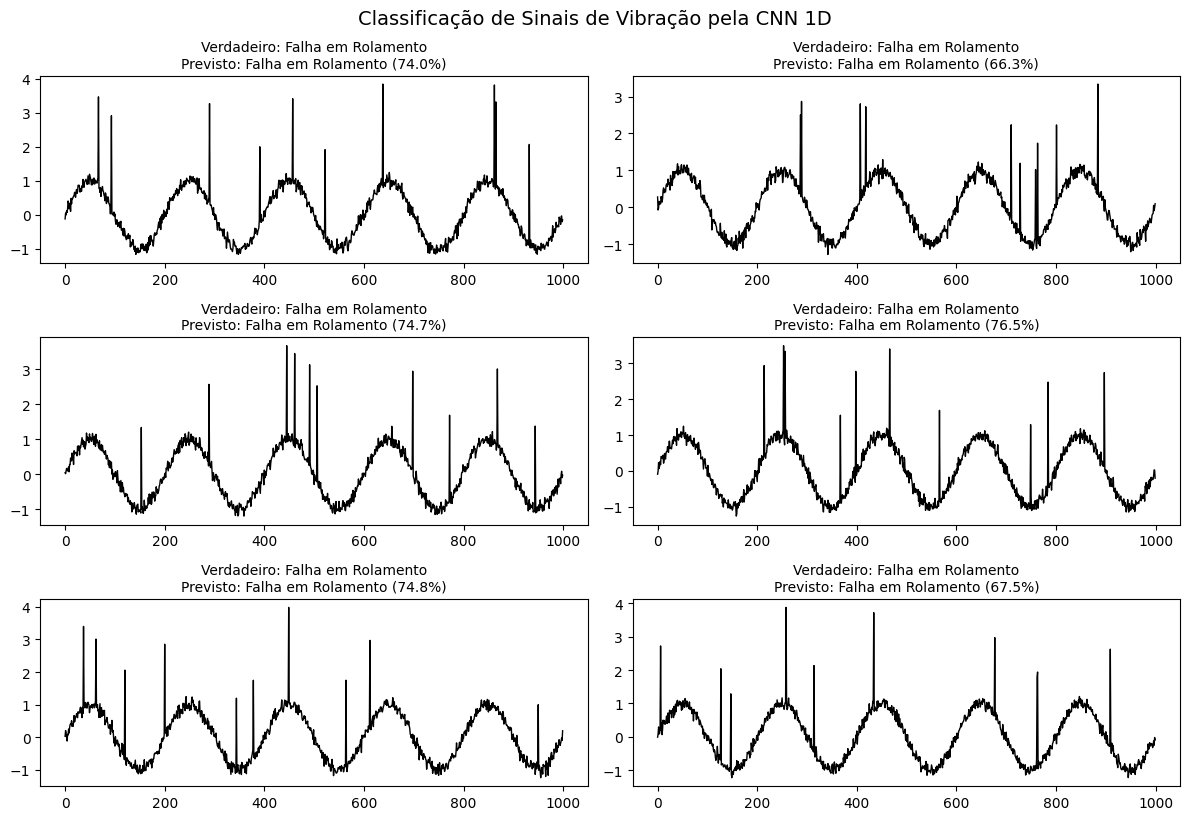

In [ ]:
# Classes correspondentes
labels = ["Normal", "Desbalanceado", "Falha em Rolamento"]

# Selecionar algumas amostras do conjunto de teste
n_show = 6
idx = np.random.choice(len(X_test), n_show, replace=False)
samples = X_test[idx]
true_labels = y_test[idx]

# Fazer predições
pred_probs = model.predict(samples)
pred_labels = np.argmax(pred_probs, axis=1)

# Plotar resultados
plt.figure(figsize=(12, 8))
for i in range(n_show):
    plt.subplot(3, 2, i + 1)
    plt.plot(samples[i].squeeze(), color="black", linewidth=1)
    plt.title(f"Verdadeiro: {labels[true_labels[i]]}\nPrevisto: {labels[pred_labels[i]]} "
              f"({pred_probs[i][pred_labels[i]]*100:.1f}%)",
              fontsize=10)
    plt.tight_layout()
plt.suptitle("Classificação de Sinais de Vibração pela CNN 1D", fontsize=14, y=1.02)
plt.show()


### Interpretação dos resultados

O gráfico mostra exemplos de sinais do conjunto de teste e suas respectivas classificações pela rede convolucional 1D.

Cada subplot exibe o sinal de vibração original, a classe verdadeira e a previsão da rede com a probabilidade associada.  
Observa-se que, mesmo em sinais com ruído, o modelo é capaz de identificar corretamente padrões característicos de cada condição operacional, confirmando que a CNN aprendeu **características locais discriminativas** ao longo do tempo.

Esse tipo de visualização é útil para validar o comportamento da rede e demonstrar como o aprendizado profundo pode ser aplicado à **análise de integridade de sistemas elétricos e mecânicos**.
